# TO DO

1. Update the `cav_dir` and `ckpt_path` parameters for each run of the `get_tcavs.main` (there are six in total). These paths are model-specific.
2. If you change the number of not-concept data sets, update the `num_random_concepts` parameter below. This should be the same value for all six models.
3. You might need to change the `num_workers` parameter which is defined in a few places in the `tcav` repo. I think it only appears in the following: `activation_generator.py` (line 142), `tcav.py` (lines 72, 183).
4. Run the notebook in full!

In [9]:
import get_tcavs
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This notebook is the one that runs the TCAV framework on the datasets. It assumes this is being run from the same directory where the `data/` directory exists. 

The `data/` directory did not allow a nested structure, so every concept / non-concept / zebra is simply a subfolder of the `data/` directory. I would not add a subdirectory structure here, unless you are sure it will work. 

`cav_dir` specifies the folder where the CAVs and activations in latent space will all be cached / saved. 
This is useful cause **the code does not run in a single execution**. What I observed is that it would log that it was working on some pairs of concepts / non-concepts, but would crash with a weird error I could not figure out. **BUT** running the same cell two or three times resulted eventually in a successful run, because if reuses everything that is already precomputed and saved in this dir. 
If you want to actually rerun the CAV framework, change this to some other name and observe the wonders of the TCAV framework. 

`ckpt_path` self explanatory: where the trained network checkpoint is saved. 

`target` the subdirectory name within the `data/` dir which contains the images of the class you want to evaluate against the concept. i.e. examples for which you want to know how relevant the concepts you are evaluating is.

Most other stuff (the target class, the depth at which we want to extract features, where the concepts and non-concepts are, etc...) is sorta hard-coded in the `get_tcavs.py` file but is easily parametrizable. 

Also, the output is super verbose, part of that is me, but part of that is also the TCAV framework.

## 3 x 20 network

In [33]:
cav_dir = 'tcav_results/balanced-100_3x20'
ckpt_path = 'models/network_balanced-100_3x20.ckpt'
target = 'all_blue_2s'
num_random_concepts = 25
network_arch = 3*[20]
bottleneck_scopes = ["fc1", "fc2"]

done 16.000000%. Took 30.136613845825195 sec
done 32.000000%. Took 31.09251856803894 sec
done 48.000000%. Took 30.113118410110474 sec
done 64.000000%. Took 28.736957788467407 sec
done 80.000000%. Took 28.96650457382202 sec
done 96.000000%. Took 29.336565494537354 sec
[{'cav_key': 'blue-not_blue_0-fc1_relu-linear-0.1', 'cav_concept': 'blue', 'target_class': 'all_blue_2s', 'i_up': 0.3, 'val_directional_dirs_abs_mean': 0.13551716598627658, 'val_directional_dirs_mean': 0.06374188849179516, 'val_directional_dirs_std': 0.22573858202635208, 'note': 'alpha_0.1 ', 'alpha': 0.1, 'bottleneck': 'fc1_relu'}, {'cav_key': 'blue-not_blue_1-fc1_relu-linear-0.1', 'cav_concept': 'blue', 'target_class': 'all_blue_2s', 'i_up': 0.15, 'val_directional_dirs_abs_mean': 0.21518543117336233, 'val_directional_dirs_mean': 0.18643038471999848, 'val_directional_dirs_std': 0.2905504627493932, 'note': 'alpha_0.1 ', 'alpha': 0.1, 'bottleneck': 'fc1_relu'}, {'cav_key': 'blue-not_blue_2-fc1_relu-linear-0.1', 'cav_concept

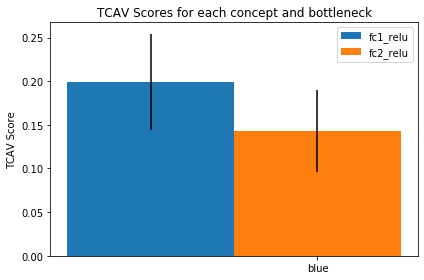

In [36]:
results = get_tcavs.main(cav_dir=cav_dir,
                         ckpt_path=ckpt_path,
                         target=target,
                         num_random_concepts=num_random_concepts,
                         network_arch=network_arch,
                         bottleneck_scopes=bottleneck_scopes)

In [37]:
cav_dir = 'tcav_results/blue2-100_3x20'
ckpt_path = 'models/network_blue2-100_3x20.ckpt'
target = 'all_blue_2s'
num_random_concepts = 25
network_arch = 3*[20]
bottleneck_scopes = ["fc1", "fc2"]

done 16.000000%. Took 29.833739519119263 sec
done 32.000000%. Took 29.92721438407898 sec
done 48.000000%. Took 29.555037021636963 sec
done 64.000000%. Took 29.307138919830322 sec
done 80.000000%. Took 28.97005343437195 sec
done 96.000000%. Took 29.736899375915527 sec
[{'cav_key': 'blue-not_blue_0-fc1_relu-linear-0.1', 'cav_concept': 'blue', 'target_class': 'all_blue_2s', 'i_up': 1.0, 'val_directional_dirs_abs_mean': 0.0005869110532632476, 'val_directional_dirs_mean': -0.0005869110532632476, 'val_directional_dirs_std': 0.0016181286513408328, 'note': 'alpha_0.1 ', 'alpha': 0.1, 'bottleneck': 'fc1_relu'}, {'cav_key': 'blue-not_blue_1-fc1_relu-linear-0.1', 'cav_concept': 'blue', 'target_class': 'all_blue_2s', 'i_up': 1.0, 'val_directional_dirs_abs_mean': 0.0007819569547280887, 'val_directional_dirs_mean': -0.0007819569547280887, 'val_directional_dirs_std': 0.0021877382636533572, 'note': 'alpha_0.1 ', 'alpha': 0.1, 'bottleneck': 'fc1_relu'}, {'cav_key': 'blue-not_blue_2-fc1_relu-linear-0.1'

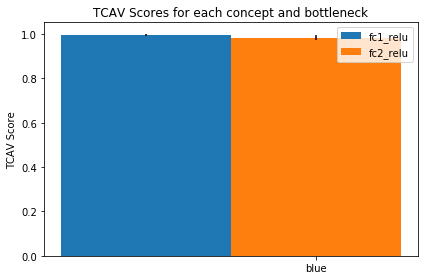

In [40]:
results = get_tcavs.main(cav_dir=cav_dir,
                         ckpt_path=ckpt_path,
                         target=target,
                         num_random_concepts=num_random_concepts,
                         network_arch=network_arch,
                         bottleneck_scopes=bottleneck_scopes)

## 3 x 50 network

In [2]:
cav_dir = 'tcav_results/balanced-100_3x50'
ckpt_path = 'models/network_balanced-100_3x50.ckpt'
target = 'all_blue_2s'
num_random_concepts = 25
network_arch = 3*[50]
bottleneck_scopes = ["fc1", "fc2"]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from models/network_balanced-100_3x50.ckpt

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.


done 16.000000%. Took 34.4273898601532 sec
done 32.000000%. Took 30.458255529403687 sec
done 48.000000%. Took 30.361778736114502 sec
done 64.000000%. Took 27.493674755096436 sec
done 80.000000%. Took 28.53481388092041 sec
done 96.000000%. To

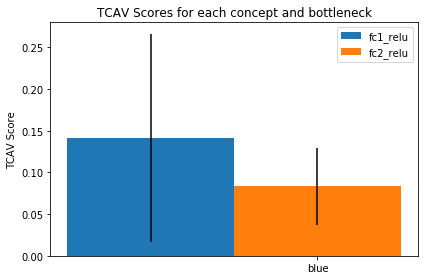

In [3]:
results = get_tcavs.main(cav_dir=cav_dir,
                         ckpt_path=ckpt_path,
                         target=target,
                         num_random_concepts=num_random_concepts,
                         network_arch=network_arch,
                         bottleneck_scopes=bottleneck_scopes)

In [10]:
cav_dir = 'tcav_results/blue2-100_3x50'
ckpt_path = 'models/network_blue2-100_3x50.ckpt'
target = 'all_blue_2s'
num_random_concepts = 25
network_arch = 3*[50]
bottleneck_scopes = ["fc1", "fc2"]

done 16.000000%. Took 30.062121391296387 sec
done 32.000000%. Took 31.263895750045776 sec
done 48.000000%. Took 29.81118655204773 sec
done 64.000000%. Took 27.192036390304565 sec
done 80.000000%. Took 26.920082807540894 sec
done 96.000000%. Took 27.131002187728882 sec
[{'cav_key': 'blue-not_blue_0-fc1_relu-linear-0.1', 'cav_concept': 'blue', 'target_class': 'all_blue_2s', 'i_up': 0.89, 'val_directional_dirs_abs_mean': 0.0002865978367064177, 'val_directional_dirs_mean': -0.0002865976082933757, 'val_directional_dirs_std': 0.0010573068696389236, 'note': 'alpha_0.1 ', 'alpha': 0.1, 'bottleneck': 'fc1_relu'}, {'cav_key': 'blue-not_blue_1-fc1_relu-linear-0.1', 'cav_concept': 'blue', 'target_class': 'all_blue_2s', 'i_up': 0.97, 'val_directional_dirs_abs_mean': 0.0001545671643711476, 'val_directional_dirs_mean': -0.0001545671578564294, 'val_directional_dirs_std': 0.00058251508457265, 'note': 'alpha_0.1 ', 'alpha': 0.1, 'bottleneck': 'fc1_relu'}, {'cav_key': 'blue-not_blue_2-fc1_relu-linear-0.1

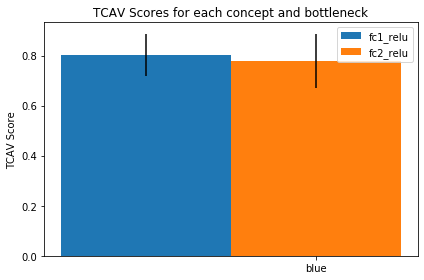

In [11]:
results = get_tcavs.main(cav_dir=cav_dir,
                         ckpt_path=ckpt_path,
                         target=target,
                         num_random_concepts=num_random_concepts,
                         network_arch=network_arch,
                         bottleneck_scopes=bottleneck_scopes)

## 5 x 50 network

In [12]:
cav_dir = 'tcav_results/balanced-100_5x50'
ckpt_path = 'models/network_balanced-100_5x50.ckpt'
target = 'all_blue_2s'
num_random_concepts = 25
network_arch = 5*[50]
bottleneck_scopes = ["fc1", "fc4"]

In [ ]:
results = get_tcavs.main(cav_dir=cav_dir,
                         ckpt_path=ckpt_path,
                         target=target,
                         num_random_concepts=num_random_concepts,
                         network_arch=network_arch,
                         bottleneck_scopes=bottleneck_scopes)

In [ ]:
cav_dir = 'tcav_results/blue2-100_5x50'
ckpt_path = 'models/network_blue2-100_5x50.ckpt'
target = 'all_blue_2s'
num_random_concepts = 25
network_arch = 5*[50]
bottleneck_scopes = ["fc1", "fc4"]

In [ ]:
results = get_tcavs.main(cav_dir=cav_dir,
                         ckpt_path=ckpt_path,
                         target=target,
                         num_random_concepts=num_random_concepts,
                         network_arch=network_arch,
                         bottleneck_scopes=bottleneck_scopes)